In [1]:
#%%
# Imports
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization
import numpy as np
import pandas 
import os
import time
import cv2
#%%
Datas = 'Fer2013/'
Dataset = []
Folders = ['train', 'test']
CATEGORIES = ['angry','disgust','fear','happy','neutral','sad','surprise']
#%%
# We now need to rearrange data. We split it between two set, one that will
# be used for training, and one that will allow us to test the model.

In [2]:
Datas = 'Fer2013/'
Train_set, Test_set = [], []
Folders = ['train', 'test']
Categories = ['angry','disgust','fear','happy','neutral','sad','surprise']
for folder in Folders:
        for category in Categories : 
            if (category == "angry"):
                a = [1,0,0,0,0,0,0]
            if (category == "disgust"):
                a = [0,1,0,0,0,0,0]
            if (category == "fear"):
                a = [0,0,1,0,0,0,0]
            if (category == "happy"):
                a = [0,0,0,1,0,0,0]
            if (category == "neutral"):
                a = [0,0,0,0,1,0,0]
            if (category == "sad"):
                a = [0,0,0,0,0,1,0]
            if(category == "surprise"):
                a = [0,0,0,0,0,0,1]
            PATH = os.path.join(Datas, folder)
            PATH = os.path.join(PATH,category)
            for el in os.listdir(PATH):
                img = cv2.imread(os.path.join(PATH,el),0)
                if (folder == 'train'):
                    Train_set.append([img, a])
                if (folder == 'test'):
                    Test_set.append([img, a])

In [3]:
X_train = []
y_train = []
X_test = []
y_test = [] 

for el in Train_set : 
    X_train.append(el[0])
    y_train.append(el[1])
for el in Test_set : 
    X_test.append(el[0])
    y_test.append(el[1])
X_train = np.array(X_train).reshape(-1, 48,48,1)
y_train = np.array(y_train)
X_test = np.array(X_test).reshape(-1, 48, 48, 1)
y_test = np.array(y_test)

In [4]:
X_train.shape

(28709, 48, 48, 1)

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
def flatten(X):
    return X.reshape(-1, X.shape[1]*X.shape[2]*X.shape[3])

In [7]:
a = flatten(X_train)
print(a.shape)

(28709, 2304)


In [8]:
model = Sequential ()
model.add(Dense(1200, input_dim=2304, activation='relu'))
model.add(Dense(600, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(7,activation = 'softmax'))

In [9]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [10]:
call_list = [keras.callbacks.EarlyStopping(patience = 5)] #jai rajouté ça, le truc regarde le val_loss et la val_accuracy
NB_epochs = 10
BATCH_size = 100
history = model.fit(flatten(X_train),
                    y_train,
                    validation_data=(flatten(X_test), y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/10
288/288 [==============================] - 2s 4ms/step - loss: 1.8074 - accuracy: 0.2554 - val_loss: 1.8029 - val_accuracy: 0.2382
Epoch 2/10
288/288 [==============================] - 1s 4ms/step - loss: 1.7039 - accuracy: 0.3239 - val_loss: 1.6564 - val_accuracy: 0.3650
Epoch 3/10
288/288 [==============================] - 1s 4ms/step - loss: 1.6734 - accuracy: 0.3407 - val_loss: 1.7551 - val_accuracy: 0.3194
Epoch 4/10
288/288 [==============================] - 1s 4ms/step - loss: 1.6450 - accuracy: 0.3523 - val_loss: 1.6825 - val_accuracy: 0.3320
Epoch 5/10
288/288 [==============================] - 1s 4ms/step - loss: 1.6277 - accuracy: 0.3612 - val_loss: 1.6103 - val_accuracy: 0.3716
Epoch 6/10
288/288 [==============================] - 1s 3ms/step - loss: 1.6128 - accuracy: 0.3702 - val_loss: 1.6050 - val_accuracy: 0.3685
Epoch 7/10
288/288 [==============================] - 1s 3ms/step - loss: 1.5926 - accuracy: 0.3777 - val_loss: 1.5983 - val_accuracy: 0.3649
Epoch 

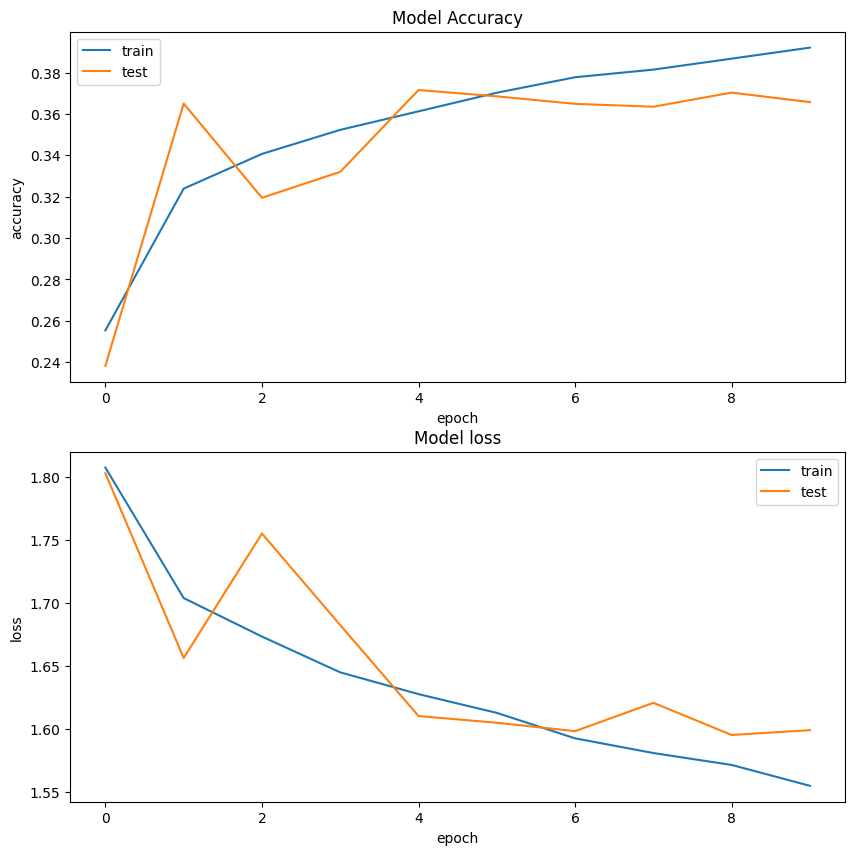

In [11]:
fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot((history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 10)


In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3),padding = 'same', activation = 'relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),activation = 'relu' ,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),activation = 'relu' ,padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(7))
model.add(Activation('softmax'))


In [13]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [14]:
call_list = [tf.keras.callbacks.EarlyStopping(patience = 10)]
NB_epochs = 10
BATCH_size = 32
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/10
898/898 [==============================] - 11s 10ms/step - loss: 1.8411 - accuracy: 0.3106 - val_loss: 1.6284 - val_accuracy: 0.3665
Epoch 2/10
898/898 [==============================] - 8s 9ms/step - loss: 1.4729 - accuracy: 0.4306 - val_loss: 1.4291 - val_accuracy: 0.4547
Epoch 3/10
898/898 [==============================] - 9s 10ms/step - loss: 1.3391 - accuracy: 0.4879 - val_loss: 1.3956 - val_accuracy: 0.4620
Epoch 4/10
898/898 [==============================] - 8s 9ms/step - loss: 1.2746 - accuracy: 0.5145 - val_loss: 1.3567 - val_accuracy: 0.4684
Epoch 5/10
898/898 [==============================] - 8s 9ms/step - loss: 1.2274 - accuracy: 0.5336 - val_loss: 1.2655 - val_accuracy: 0.5242
Epoch 6/10
898/898 [==============================] - 8s 9ms/step - loss: 1.1815 - accuracy: 0.5503 - val_loss: 1.1824 - val_accuracy: 0.5469
Epoch 7/10
898/898 [==============================] - 8s 9ms/step - loss: 1.1481 - accuracy: 0.5617 - val_loss: 1.2275 - val_accuracy: 0.5357
Epo

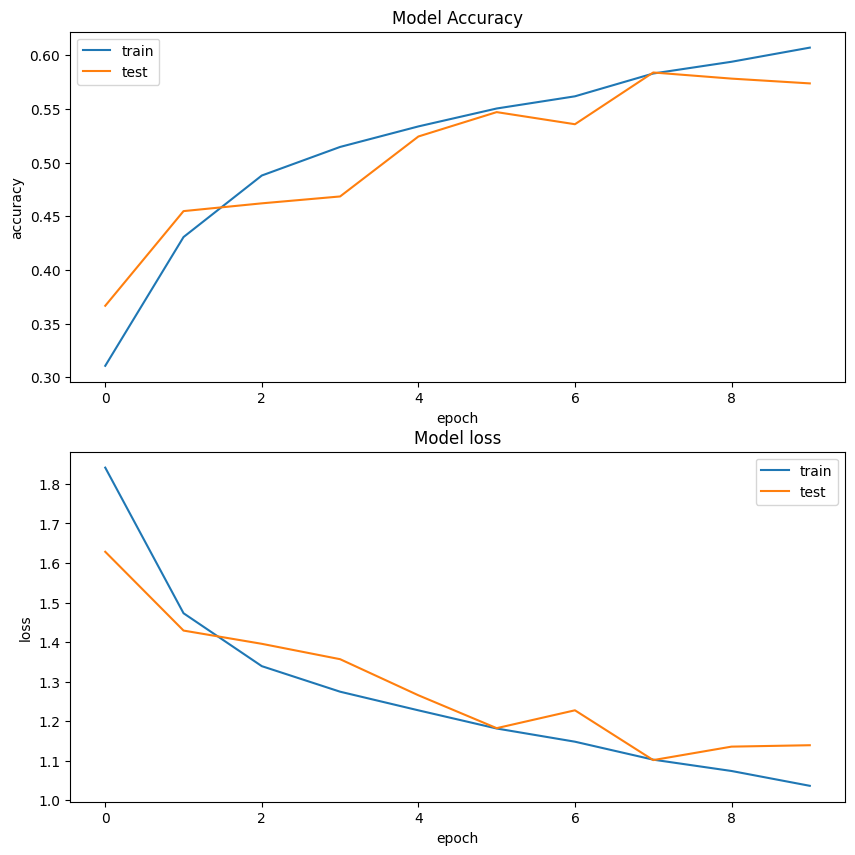

In [15]:
fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot((history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 10)

In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3),padding = 'same', activation = 'relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),activation = 'relu' ,padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3),activation = 'relu' ,padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))



model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Dense(7))
model.add(Activation('softmax'))


In [17]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 5,
                                         width_shift_range = 0.15,
                                         height_shift_range = 0.15,
                                         horizontal_flip = True,
                   
                                         zoom_range = 0.15,
                                         )

In [18]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [19]:
call_list = [tf.keras.callbacks.EarlyStopping(patience = 10)]
NB_epochs = 30
BATCH_size = 32

history = model.fit(x = datagen.flow(X_train, y_train, batch_size=BATCH_size),
                    validation_data=(X_test, y_test),
                    epochs=NB_epochs,
                    batch_size=BATCH_size,
                    callbacks= call_list
                    )

Epoch 1/30
898/898 [==============================] - 10s 10ms/step - loss: 1.9453 - accuracy: 0.2373 - val_loss: 1.6879 - val_accuracy: 0.3211
Epoch 2/30
898/898 [==============================] - 10s 11ms/step - loss: 1.7003 - accuracy: 0.3241 - val_loss: 1.7029 - val_accuracy: 0.3341
Epoch 3/30
898/898 [==============================] - 15s 17ms/step - loss: 1.5636 - accuracy: 0.3863 - val_loss: 1.5844 - val_accuracy: 0.4042
Epoch 4/30
898/898 [==============================] - 14s 16ms/step - loss: 1.4878 - accuracy: 0.4254 - val_loss: 1.3688 - val_accuracy: 0.4726
Epoch 5/30
898/898 [==============================] - 12s 13ms/step - loss: 1.4389 - accuracy: 0.4451 - val_loss: 1.3635 - val_accuracy: 0.4781
Epoch 6/30
898/898 [==============================] - 11s 12ms/step - loss: 1.4046 - accuracy: 0.4599 - val_loss: 1.4000 - val_accuracy: 0.4579
Epoch 7/30
898/898 [==============================] - 11s 13ms/step - loss: 1.3749 - accuracy: 0.4708 - val_loss: 1.2713 - val_accuracy:

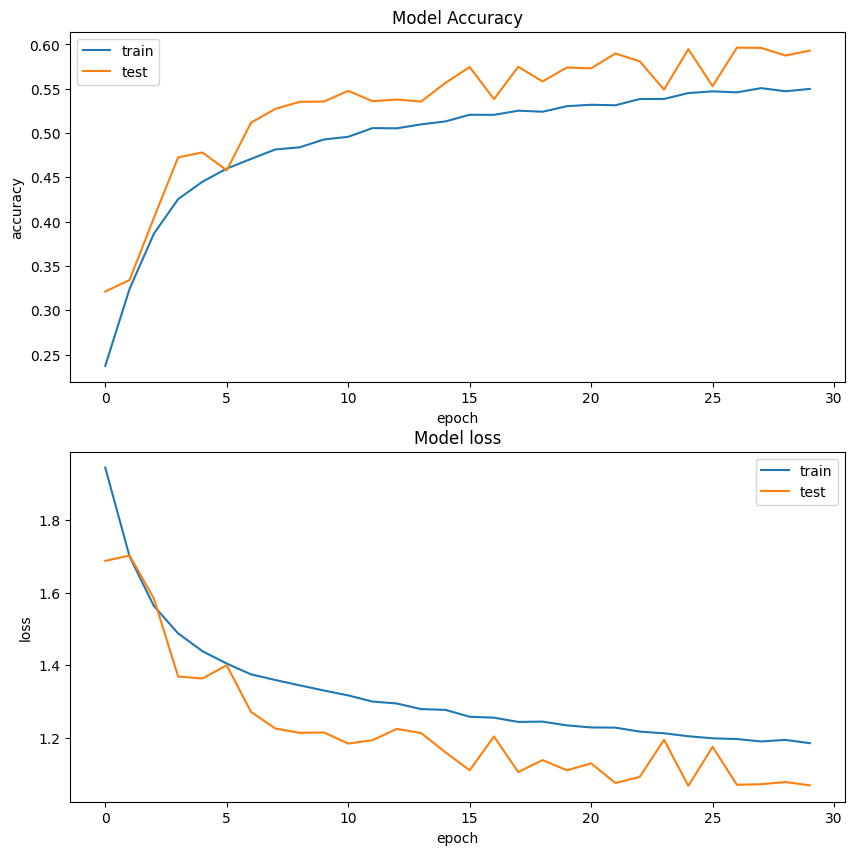

In [20]:
fig, axis = plt.subplots(2)
#fig.suptitle('Accuracy and loss')

axis[0].plot(history.history['accuracy'])
axis[0].plot(history.history['val_accuracy'])
axis[0].set_title('Model Accuracy')
axis[0].set_ylabel('accuracy')
axis[0].set_xlabel('epoch')
axis[0].legend(['train', 'test'])

axis[1].plot(history.history['loss'])
axis[1].plot((history.history['val_loss']))
axis[1].set_title('Model loss')
axis[1].set_ylabel('loss')
axis[1].set_xlabel('epoch')
axis[1].legend(['train', 'test'])

fig.set_size_inches(10, 10)

In [21]:
Y_pred = model.predict(X_test)

225/225 [==============================] - 1s 2ms/step


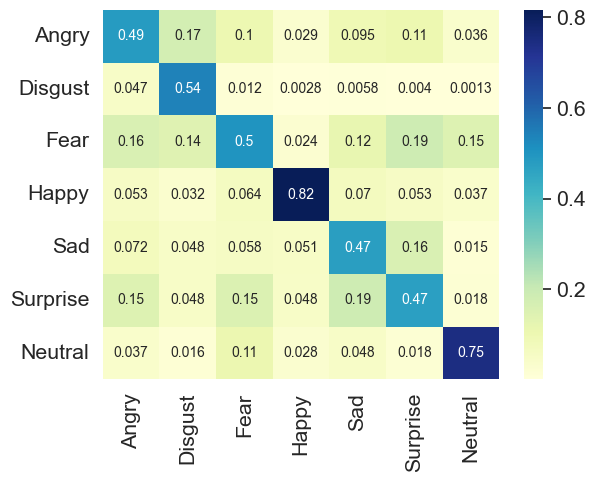

In [22]:
import seaborn as sn
matrix = confusion_matrix(y_test.argmax(axis=1), Y_pred.argmax(axis=1),normalize = 'pred')
confuse = pd.DataFrame(matrix, ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"] , ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]) #range(matrix.shape[0])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confuse, cmap="YlGnBu", annot=True, annot_kws={"size": 10}) # font size

plt.show()

In [23]:
# Ici, voici un petit code pour prédire vos propres photos
# Pour le lancer, vous avez juste à placer votre image dans le même dossier que le notebook et à mettre son nom 
# avec l'extension en argument de la fonction

def prediction(img):
    
    img = cv2.imread(img,0)
    img = cv2.resize(img,(48,48))
    #plt.imshow(img)
    img = img.reshape(1,48,48,1)
    a = np.argmax(model.predict(img))
    if(a==0):
        print('Angry')
    elif(a==1):
        print('Disgust')
    elif(a==2):
        print('Fear')
    elif(a==3):
        print ('Happy')
    elif(a==4):
        print('Sad')
    elif(a==5):
        print('Surprise')
    elif(a==6):
        print('Neutral')
    

    

In [27]:
prediction('Pierre.jpg')

error: OpenCV(4.6.0) C:\b\abs_74oeeuevib\croots\recipe\opencv-suite_1664548340488\work\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [29]:
img = cv2.imread('Test.jpg',0)
img = cv2.resize(img,(48,48))
#plt.imshow(img)
img = img.reshape(1,48,48,1)
model.predict(img)

1/1 [==============================] - 0s 18ms/step


array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

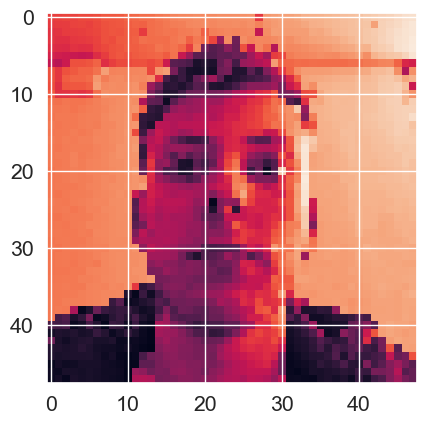

In [32]:
plt.imshow(cv2.resize(cv2.imread('test.jpg',0),(48,48)))